In [1]:
cd /Users/anchitkhanna/Downloads

/Users/anchitkhanna/Downloads


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
import copy
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [3]:
solar_data = pd.read_csv("data_project_deepsolar.csv") #Reading of Data file

In [4]:
solar_data.shape #Checking the structure of the dataframe and information of the features in the dataframe
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20736 entries, 0 to 20735
Data columns (total 81 columns):
solar_system_count                         20736 non-null object
state                                      20736 non-null object
average_household_income                   20736 non-null float64
employed                                   20736 non-null int64
gini_index                                 20736 non-null float64
land_area                                  20736 non-null float64
per_capita_income                          20736 non-null int64
population                                 20736 non-null int64
population_density                         20736 non-null float64
total_area                                 20736 non-null float64
unemployed                                 20736 non-null int64
water_area                                 20736 non-null float64
education_less_than_high_school_rate       20736 non-null float64
education_high_school_graduate_rate        

In [5]:
solar_data_numeric = solar_data.copy() #It is good to make a copy of original dataset before making any changes

In [6]:
solar_data_numeric = solar_data_numeric.select_dtypes(exclude=['bool']) #Dropping boolean values as it is unnecessary
solar_data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20736 entries, 0 to 20735
Data columns (total 79 columns):
solar_system_count                         20736 non-null object
state                                      20736 non-null object
average_household_income                   20736 non-null float64
employed                                   20736 non-null int64
gini_index                                 20736 non-null float64
land_area                                  20736 non-null float64
per_capita_income                          20736 non-null int64
population                                 20736 non-null int64
population_density                         20736 non-null float64
total_area                                 20736 non-null float64
unemployed                                 20736 non-null int64
water_area                                 20736 non-null float64
education_less_than_high_school_rate       20736 non-null float64
education_high_school_graduate_rate        

## Label Encoding 

In [7]:
solar_data_numeric['solar_system_count'] = solar_data_numeric['solar_system_count'].astype('category').cat.codes
solar_data_numeric['state'] = solar_data_numeric['state'].astype('category').cat.codes
target_column = solar_data_numeric[['solar_system_count','state']]
print(target_column.head())
solar_data_numeric = solar_data_numeric.drop(['solar_system_count', 'state'], axis = 1)
solar_data_numeric.head()

   solar_system_count  state
0                   1      5
1                   1      5
2                   1      5
3                   0      5
4                   1      5


,average_household_income,employed,gini_index,land_area,per_capita_income,population,population_density,total_area,unemployed,water_area,...,occupation_transportation_rate,occupation_arts_rate,occupation_agriculture_rate,occupancy_vacant_rate,voting_2016_dem_percentage,voting_2016_gop_percentage,voting_2012_dem_percentage,voting_2012_gop_percentage,number_of_years_of_education,diversity
0,108954.822006,2168,0.4072,10.584060,39801,4315,407.6887,11.206440,206,0.622382,...,0.048893,0.053044,0.030443,0.025237,0.447855,0.512451,0.519,0.467,14.144793,0.275435
1,122821.442370,1727,0.4434,47.047000,53892,3596,76.4342,49.346240,83,2.299237,...,0.034742,0.078170,0.000000,0.093403,0.447855,0.512451,0.519,0.467,15.056240,0.220617
2,39521.764221,1279,0.5342,0.399954,7160,6727,16819.4200,0.405578,68,0.005623,...,0.003909,0.014073,0.000000,0.038065,0.447855,0.512451,0.519,0.467,11.078675,0.010646
3,48647.395833,880,0.3928,0.897123,8461,4423,4930.2070,0.902341,49,0.005218,...,0.071591,0.089773,0.000000,0.071342,0.447855,0.512451,0.519,0.467,11.397093,0.000000
4,129044.956027,2491,0.5091,24.671080,50092,5073,205.6254,24.825590,181,0.154507,...,0.028904,0.087916,0.000000,0.112896,0.447855,0.512451,0.519,0.467,14.735696,0.170425


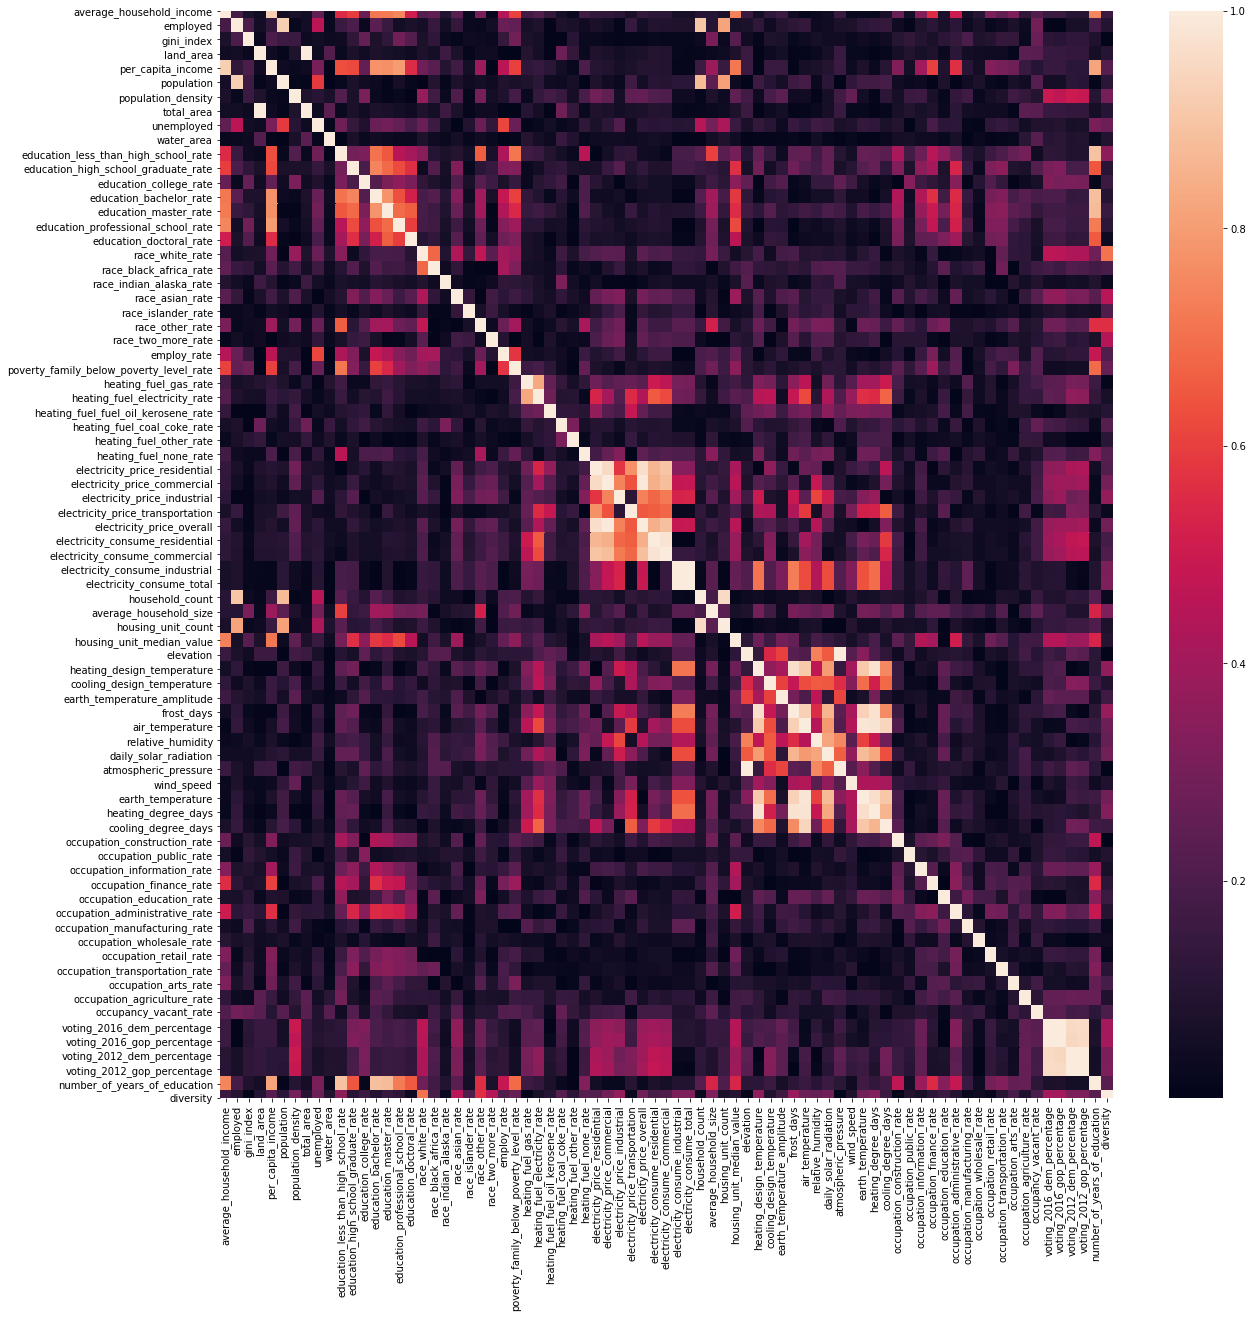

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(df_corr)
plt.show()

In [9]:
df_corr = solar_data_numeric.corr().abs() # Create correlation matrix
upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(np.bool)) #Selecting upper traingle for correaltion matrix
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)] #Removing features with correalation greater than 0.8
X_significant = solar_data_numeric.drop(to_drop, axis = 1) #Dropping highly correlated features

In [11]:
X_significant['state'] = target_column['state']
target_column = target_column.drop(['state'], axis = 1)


In [12]:
x_train,x_test,y_train,y_test=train_test_split(X_significant,target_column.values.ravel(),test_size=0.2, random_state=101)

## Algorithm 1: Logistic Regression

In [13]:
logistic_fit = LogisticRegression(max_iter=10000).fit(x_train, y_train) #Fitting the logistic regression model
logistic_predict = logistic_fit.predict(x_test) #Predicting values using the training data
print(classification_report(y_test, logistic_predict)) #Classification report
# confusion_matrix(y_train, logistic_predict)
tn, fp, fn, tp = confusion_matrix(logistic_predict, y_test).ravel()
logistic_fit.score(x_test, y_test)

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      2156
           1       0.84      0.85      0.84      1992

    accuracy                           0.85      4148
   macro avg       0.85      0.85      0.85      4148
weighted avg       0.85      0.85      0.85      4148



0.8490838958534234

## Algorithm 2: Bagging classifier

In [29]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(n_estimators = 100)
# fit the model on the whole dataset
model.fit(x_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=100,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [30]:
predbag=model.predict(x_test)

In [31]:
print(classification_report(y_test,predbag))
model.score(x_test, y_test)

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      2156
           1       0.90      0.90      0.90      1992

    accuracy                           0.90      4148
   macro avg       0.90      0.90      0.90      4148
weighted avg       0.90      0.90      0.90      4148



0.9013982642237223

In [76]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [77]:
pred=clf.predict(x_test)

In [78]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2186
           1       0.90      0.87      0.88      1962

    accuracy                           0.89      4148
   macro avg       0.89      0.89      0.89      4148
weighted avg       0.89      0.89      0.89      4148



## Boosting: AdaBoost

In [20]:
from sklearn.ensemble import AdaBoostClassifier
boosting_fit = AdaBoostClassifier(n_estimators=100).fit(x_train, y_train)

In [21]:
boosting_pred = boosting_fit.predict(x_test)

In [22]:
print(classification_report(y_test, boosting_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      2156
           1       0.89      0.88      0.89      1992

    accuracy                           0.89      4148
   macro avg       0.89      0.89      0.89      4148
weighted avg       0.89      0.89      0.89      4148



## Boosting: Gradient

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost_fit = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(x_train, y_train)

In [24]:
grad_boost_pred = grad_boost_fit.predict(x_test)

In [25]:
print(classification_report(y_test, grad_boost_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2156
           1       0.90      0.89      0.89      1992

    accuracy                           0.90      4148
   macro avg       0.90      0.90      0.90      4148
weighted avg       0.90      0.90      0.90      4148



## SVM

In [91]:
from sklearn.svm import LinearSVC
svm_fit = LinearSVC(dual = False)
svm_fit.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [92]:
svm_pred = svm_fit.predict(x_test)

In [93]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      2186
           1       0.82      0.86      0.84      1962

    accuracy                           0.84      4148
   macro avg       0.84      0.84      0.84      4148
weighted avg       0.84      0.84      0.84      4148



In [111]:
columns = ["Logistic", "Bagging", "random forest", "Boosting","Gradient Boosting", "SVM", "best", "test"]
out = pd.DataFrame(columns = columns)
# out = out.append({"Logistic": 89,"Bagging": 45, "random.forest": 56, "Boosting": 65, "SVM":78, "best":'svm', "test":87}, ignore_index = True)
for i in range(1,51):
    print("Iteration: {0:d}\r".format(i), end = '', flush = True)
    x_train,x_test,y_train,y_test = train_test_split(X_significant,target_column.values.ravel(),test_size=0.2)
    x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.25)
    #Logistic Regression
    logistic_fit = LogisticRegression(max_iter=10000).fit(x_train, y_train) #Fitting the logistic regression model
    logistic_predict = logistic_fit.predict(x_val) #Predicting values using the training data
#     print(classification_report(y_test, logistic_predict)) #Classification report
    # confusion_matrix(y_train, logistic_predict)
#     tn, fp, fn, tp = confusion_matrix(logistic_predict, y_test).ravel()
    lr_score = logistic_fit.score(x_val, y_val)
    #Bagging Algorithm
    bag_model = BaggingClassifier()
# fit the model on the whole dataset
    bag_model_fit = bag_model.fit(x_train, y_train)
    predbag = bag_model_fit.predict(x_val)
    bag_score = bag_model_fit.score(x_val, y_val)
    #Random Forest
    rand_fit = RandomForestClassifier().fit(x_train, y_train)
    rand_pred = rand_fit.predict(x_val)
    rand_score = rand_fit.score(x_val, y_val)
    #ADABoosting
    boosting_fit = AdaBoostClassifier(n_estimators=100).fit(x_train, y_train)
    boosting_pred = boosting_fit.predict(x_val)
    boosting_score = boosting_fit.score(x_val, y_val)
    #Gradient Boosting
    grad_boost_fit = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1).fit(x_train, y_train)
    grad_boost_pred = grad_boost_fit.predict(x_val)
    grad_boost_score = grad_boost_fit.score(x_val, y_val)
    #SVM
    svm_fit = LinearSVC(dual = False).fit(x_train, y_train)
    svm_pred = svm_fit.predict(x_val)
    svm_score = svm_fit.score(x_val, y_val)
    #Storing results of all algorithms in a dictionary
    result = {"Logistic": lr_score,"Bagging": bag_score, "random forest": rand_score, "Boosting": boosting_score,"Gradient Boosting": grad_boost_score, "SVM":svm_score}
    result["best"] = max(result, key = lambda key: result[key])
    #creating switch case to test the model with best classifier
    if result["best"] == 'Logistic':
        result["test"] = logistic_fit.score(x_test, y_test)
    elif result["best"] == 'Bagging':
        result["test"] = bag_model_fit.score(x_test, y_test)
    elif result["best"] == 'random forest':
        result["test"] = rand_fit.score(x_test, y_test)
    elif result["best"] == 'Boosting':
        result["test"] = boosting_fit.score(x_test, y_test)
    elif result["best"] == 'Gradient Boosting':
        result["test"] = grad_boost_fit.score(x_test, y_test)
    else:
        result["test"] = svm_fit.score(x_test, y_test)
    out = out.append(result, ignore_index = True)


In [120]:
out.describe()

,Logistic,Bagging,random forest,Boosting,Gradient Boosting,SVM,test
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.850523,0.889443,0.891088,0.887890,0.891956,0.849134,0.889855
std,0.004813,0.004608,0.004028,0.004306,0.004584,0.004665,0.004896
min,0.835785,0.878225,0.883530,0.875814,0.880154,0.835544,0.876567
25%,0.847179,0.885942,0.888715,0.885399,0.889981,0.846395,0.887657
50%,0.850856,0.889197,0.890764,0.887871,0.892332,0.848927,0.890429
75%,0.853569,0.892151,0.894020,0.890704,0.894864,0.851821,0.892900
max,0.863034,0.899928,0.901133,0.900651,0.902339,0.860381,0.899470


In [117]:
out.best.value_counts()

Gradient Boosting    22
random forest        17
Bagging              10
Boosting              1
Name: best, dtype: int64

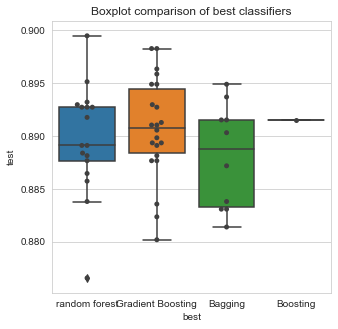

In [118]:
sns.set_style("whitegrid")
plt.figure(figsize=(5,5))
sns.boxplot(x = out.best, y = out.test).set(title = "Boxplot comparison of best classifiers", xlabel = "Type of classifier", ylabel = "Accuracy on test data")
sns.swarmplot(x = out.best, y = out.test, color = ".25")
# out.iloc[:,0:6]

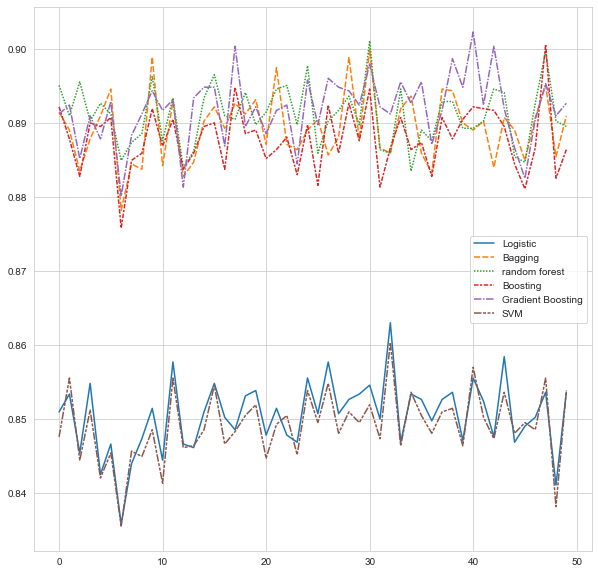

In [119]:
plt.figure(figsize=(10,10))
sns.lineplot(data = out.iloc[:,0:6])